# Perceptron.  Regresión lineal simple.  Ejemplo básico

## Importamos las librerías

In [1]:
# Para este ejemplo, necesitamos numpy sí o sí.
import numpy as np

# Utilizamos estas 2 librerías sólo para visualizar los datos.
# En condiciones normales no las usaremos.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generamos los datos (aleatorios)

In [2]:
# Generamos 1000 observaciones
observations = 1000

np.random.seed(123)

# Usaremos 2 variables como datos de entrada.  Podemos verlas como x1 y x2 de lo visto en la presentación
# Las nombraremos x y z
# Generamos los datos de manera aleatoria a través de una distribución uniforme. Necesitamos 3 argumentos; low, high, size.
# El tamaño de xs (x size) y zs (z size) es el de las observaciones por 1. En este caso: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combinamos las 2 dimensiones de entrada en una matriz de entrada
inputs = np.column_stack((xs,zs))

# Comprobamos si las dimensiones de los valores de entrada que deberán ser 1000x2
print (inputs.shape)

(1000, 2)


## Generamos los datos de la variable objetivo

In [3]:
# Usaremos la siguiente función lineal:
# f(x,z) = 2x - 3z + 5 + <ruido>
np.random.seed(123)
noise = np.random.uniform(-1, 1, (observations,1))

# Generamos las salidas, de acuerdo a la funcion
# Donde los pesos son 2 y -3 y el bias es 5
targets = 2*xs - 3*zs + 5 + noise
#targets = 13 * xs + 7 * zs -12

# Comprobamos las dimensiones de targets, que deberían ser de 1000x1
print (targets.shape)

(1000, 1)


In [4]:
targets

array([[ 3.83380395e+01],
       [-3.68452583e+00],
       [ 6.19435693e+00],
       [-1.24429182e+00],
       [ 1.42215399e+01],
       [ 2.96077802e+01],
       [ 3.60740623e+01],
       [ 1.34192976e+01],
       [-1.33090693e-01],
       [ 2.41766581e+01],
       [-1.05848007e+01],
       [ 2.39982270e+01],
       [ 2.14447566e+01],
       [-3.18131296e+01],
       [ 2.66004555e+01],
       [-1.07903842e+01],
       [-2.07113169e+01],
       [-7.16648746e+00],
       [ 3.56555046e+01],
       [ 1.29292400e+01],
       [ 1.89693545e+00],
       [-1.85865053e+00],
       [ 7.36128400e+00],
       [ 1.58005422e+01],
       [ 1.75010589e+01],
       [-2.48334452e+01],
       [ 8.11368497e+00],
       [ 1.96775998e+01],
       [-2.24363463e-01],
       [-1.94065504e+01],
       [-4.91796428e+00],
       [ 2.06321663e+01],
       [ 2.93884279e+01],
       [ 2.44766411e+01],
       [ 1.24410079e+01],
       [-7.34172876e+00],
       [-8.02855005e+00],
       [ 4.89532094e+01],
       [-2.5

## Pintamos los datos

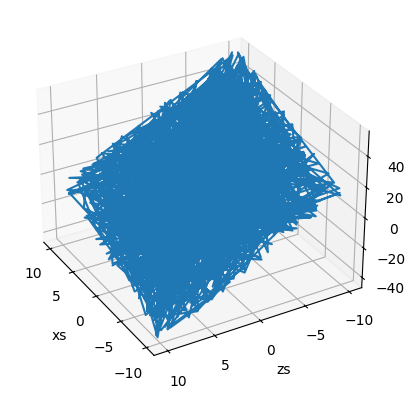

In [5]:
# Necesitamos que los datos tengan las dimensiones correctas
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
targets = targets.reshape(observations,)


# Declaramos el objeto imagen
fig = plt.figure()

# Metodo para crear un plot 3d
ax = fig.add_subplot(111, projection='3d')

# Elegimos los ejes
ax.plot(xs, zs, targets)

# Definimos las etiquetas
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# A través de esta variable podemos modificar el ángulo de visión.
# Prueba con diferentes valores
ax.view_init(azim= 150)

# Pintamos
plt.show()

# Devolvemos los datos a sus dimensiones originales.
# El cambio era sólo para pintarlos.
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

## Inicialización de las variables

In [6]:
# Inicializamos los pesos y bias de manera aletoria, a través de init_range
# Valores altos en init_range evitarán que el algoritmo sea capaz de aprender.
np.random.seed(123)
init_range = 0.1

# Los pesos tienen unas dimesniones de k x m, donde k es el número de variables de entrada y and m es el número de variables
# de salida
# En nuestro caso, la matriz de pesos es de 2x1 (2 variables de entrada, 'x' y 'z' y una variable de salida 'y')
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# El bías, sólo tendrá una dimensión, puesto que sólo hay una variable de salida. Por tanto, será un escalar
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[ 0.03929384]
 [-0.04277213]]
[-0.05462971]


## Definimos el ratio de aprendizaje

In [7]:
# Ratios demasiado altos harán que nuestra red no aprenda y demasiado bajos, que no alcance el objetivo para
# las repeticiones definidas.
# Juega con este ratio para ver los resultados
learning_rate = 0.01

## Entrenamos el modelo

In [8]:
# Vamos a iterar 100 veces a lo largo de nuestro set de entrenamiento que funciona bien para el ratio de entrenamiento de 0.02
for i in range (100):

    # Generamos el modelo lineal basado en: y = xw + b
    # np.dot permite la multiplicación de matrices
    outputs = np.dot(inputs,weights) + biases
    # Los deltas, son las diferencias entre los targets y los outputs
    # Los deltas en este caso son un vector de 1000x1
    deltas = outputs - targets

    # La idea es iterar para conseguir reducir el error cuadrático medio

    loss = np.sum(deltas**2)/2 / observations

    # Printamos el error cuadrático medio
    print ("loss: ", loss)
    print ("pesos: ", weights)
    print ("bias: ", biases, "\n")

    # Otro truco que vamos a usar, es escalar los deltas en base a las observaciones
    # Ésto nos ayuda a seleccionar mejor el ratio de aprendizaje, ya que estará
    # en la misma escala (propoción) que el error cuadrático medio
    deltas_scaled = deltas / observations

    # Para terminar, aplicamos el descenso del gradiente para poder encontrar el mínimo local
    # Las dimensiones de los pesos son 2x1, el ratio de entrenamiento 1x1 (escalar), inputs 1000x2 y los
    # deltas escalados 1000x1.
    # Para poder aplicar el procedimiento, debemos transponer los inputs
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

    # Los pesos se actualizan de forma algebraica lineal (una matriz menos otra matriz)
    # Los sesgos, sin embargo, son un solo número aquí, por lo que debemos transformar los deltas en un escalar.
    # Las dos líneas son ambas consistentes con la metodología de descenso de gradiente.

loss:  248.80400694112734
pesos:  [[ 0.03929384]
 [-0.04277213]]
bias:  [-0.05462971] 

loss:  108.03677406715136
pesos:  [[ 0.75553937]
 [-1.1405144 ]]
bias:  [-0.00441149] 

loss:  50.969540963742446
pesos:  [[ 1.22149695]
 [-1.83150951]]
bias:  [0.04542023] 

loss:  27.72704056842079
pesos:  [[ 1.52500351]
 [-2.26622676]]
bias:  [0.09482834] 

loss:  18.167917761948118
pesos:  [[ 1.72294567]
 [-2.53954844]]
bias:  [0.14379067] 

loss:  14.151646251762642
pesos:  [[ 1.85220681]
 [-2.7112809 ]]
bias:  [0.19229463] 

loss:  12.384935824737203
pesos:  [[ 1.93672845]
 [-2.81910479]]
bias:  [0.24033381] 

loss:  11.534005471262306
pesos:  [[ 1.99206979]
 [-2.88674926]]
bias:  [0.28790574] 

loss:  11.05798282941859
pesos:  [[ 2.02835468]
 [-2.92914983]]
bias:  [0.33501048] 

loss:  10.737199548367522
pesos:  [[ 2.05217853]
 [-2.95570182]]
bias:  [0.38164972] 

loss:  10.482270239266006
pesos:  [[ 2.06784346]
 [-2.9723118 ]]
bias:  [0.42782618] 

loss:  10.256729426497706
pesos:  [[ 2.0781

## Pintamos los pesos y los biases y comprobamos si son correctos

In [9]:
# Cuando hemos declarado f(x,z), los pesos eran 2 y -3, mientras que el bias era 5.
# Deberíamos obtener datos iguales
print (weights, biases)

# Vemos que CASI convergen, por lo que son necesarias más iteraciones.

[[ 2.09926742]
 [-2.99990917]] [3.14948112]


## Pintamos los outputs vs los targets

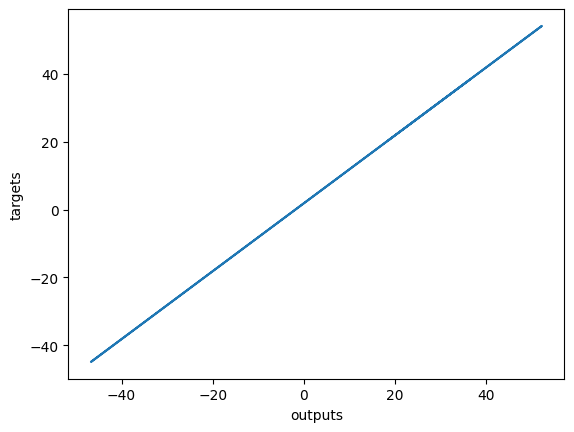

In [10]:
# Cuanto más cercanos sea el gráfico a una línea de 45 grados, más cercanos son los valores output y target.
# Ésto es un ejercicio académico para entender el procedimiento puesto que no se realiza habitualmente.

plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()